In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from understanding_helper_functions import *

In [2]:
#%matplotlib notebook

# Understanding Data

## (or, lies I've been told about statistics)

#### Version 0.1

-----

By AA Miller (Northwestern/Adler Planetarium)

5 Sep 2019

According to the [DSFP curriculum](https://astrodatascience.org/curriculum), this entire week is going to be devoted to statistics (an entire field unto itself). 

In practice, however, statistics is too big a topic to fully tackle in a week. 

A more apt description for this week's theme is **models**, and this is a good thing, because everything in astronomy is a model (more on this in just a bit).

Broadly speaking, we build models for two purposes:

*forecasting*

and

*inference*.

Forecasting is about predicting the outcome of some future, as of yet, unobserved event. 

This can be extremely useful if you have measured the velocity dispersion of some galaxy and you would like to know the mass of the black hole at the center of that galaxy.

(*aside* – machine learning is essentially all about forecasting)

Inference is about understanding the fundamental relationship between different parameters. Inference can be used for forecasting (the otherway around isn't always true). 

Inference is necessary for understanding physics. While the following statement can be incredibly useful, "based on 10 measurements of a force applied to this ball, I predict that a newly applied force, $F_\mathrm{new}$, will produce acceleration $F_\mathrm{new}/m_\mathrm{ball}$," it is far more useful to say $F = ma$ for any object with mass $m$.

(*aside* – machine learning is not useful for inference)

Before we start any discussion of models, we need to back up and zoom out a bit, because models require...

## Problem 1) Data

At the core of everything we hope to accomplish with the DSFP stands a single common connection: data.

Using a vast array of telescopes across the planet and in outter space we are able to collect data that allow us to unravel the mysteries of the universe!

This naturally leads to the question:

**Problem 1a**

What is data?

*Take a few min to discuss this with your partner*

**Solution 1a**

While we just discussed several different ideas about the nature of data, the main thing I want to emphasize is the following: data are *constants*.

Hypothetical question – what if a data reduction pipeline changes (for the better), and, as a result the endproducts (i.e. data output) have changed? 

Doesn't this mean that the data have changed?

This is a subtle point, but, in this case the data have not changed. The output from the pipeline, which we often think of as "data," is actually a *model*. Adjustments in the pipeline result in changes in the model, and any downstream analysis changes because the model has changed.

Models vary, data don't.

To clearly reiterate this point: imagine you want to determine the "turn-off" age for an open cluster. To do this, you would need to know the flux of each star in the cluster, which could then be compared to stellar evolution models.

But wait!

The stellar fluxes are themselves a model. Before LSST can report some flux plus or minus some uncertainty in a database, the project has to do the following: bias-subtract the raw CCD image (model #1), flat-field correct the bias-subtracted image (model #2), identify the pixel location of all the stars in the image (model #3), align the relative pixel-positions with a standard astrometric reference frame (model #4), determine the relative flux of every star and galaxy in the image (model #5), and convert those relative fluxes to absolute values by identifying "standard" stars with known absolute flux to calibrate the relative flux measurements (model #6).

So really, the flux of a star, which we would normally refer to as a data point for the stellar evolution model, is in fact a model of several models.

This brings us back to the earlier claim: everything in astronomy is models. (it's models all the way down...)

This should also make you a little nervous – have the uncertainties been properly estimated for each of those models, and if they have, have they been propagated to the final numbers that are available in the database?

## Problem 2) Linear Models and Least-Squares Fitting

Execute the cell below in order to populate your namespace with some data that we will use for the subsequent analysis.

In [3]:
x, y, y_unc = pollute_namespace()

You now have some data $x$ and $y$.

**Problem 2a**

As a good data scientist, what is the first thing you should do with this data?

In [4]:
# complete

**Solution 2a**

I intentionally mislead with the previous question. 

The most important thing to do with *any* new data is understand where the data came from and what they represent. While the data are constants, they represent measurements of some kind. Thus, I would argue the most important thing to do with this data is understand where they came from (others may disagree).

In this case, we have "toy" data that were randomly generated for today's lecture. In that sense, there are no units or specific measurements that otherwise need to be understood. 

**Problem 2b**

Make a scatter plot of the data to understand the relationship between $x$ and $y$.

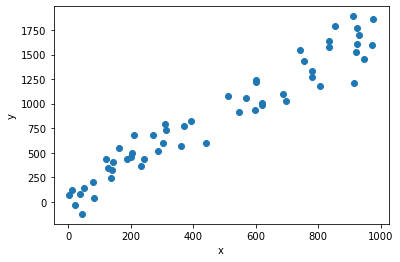

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, "o")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

There is a very good chance, though I am not specifically assuming anything, that upon making the previous plot you had a thought along the lines of "these points fall on a line" or "these data represent a linear relationship."  

**Problem 2c** 

Is the assumption of linearity valid for the above data?

Is it convenient?

*Take a few min to discuss this with your partner*

**Solution 2c**

One of the lessons from this lecture is the following: *assumptions are dangerous*! In general, a linear relationship between data should only be assumed if there is a very strong theoretical motivation for such a relationship. Otherwise, the relationship could be just about anything, and inference based on an assumption of linearity may lead to dramatically incorrect conclusions (forecasting, on the other hand, may be just fine).

That being said, assuming the data represent (are drawn) from a linear relationship is often very convenient. There are a large host of tools designed to solve this very problem.

Let us proceed with convenience and assume the data represent a linear relationship. In that case, to understand the underlying relationship between the data, we need to fit a line to the data. 

Nearly all statistical texts or courses start with the "standard" [least-squares fitting](https://en.wikipedia.org/wiki/Least_squares) procedure. In brief, least-squares minimizes the sum of the squared value of the residuals between the data and the fitting function.

Furthermore, in the case of simple polynomial models, straightforward matrix multiplication can be used to determine an exact answer. That is, the model parameters that minimize the sum of the squares (we will skip the derivation for now).

Instead, we will rely on google, which informs us that the easiest way to perform a linear least-squares fit to the above data is with [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), which performs a least-squares polynomial fit to two `numpy` arrays.

**Problem 2d**

Use `np.polyfit()` to fit a line to the data. Overplot the best-fit line on the data.

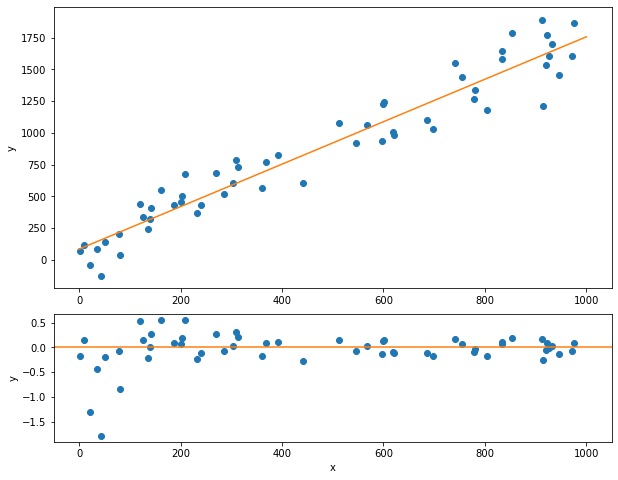

In [6]:
p = np.polyfit(x, y, deg=1)
p_eval = np.poly1d(p)

xp = np.linspace(0, 1000, 1000)
y_pred = p_eval(xp)

fig = plt.figure(figsize=(10,8))
ax = plt.subplot2grid((3,1), (0, 0), rowspan=2)
ax_res = plt.subplot2grid((3,1), (2, 0), sharex=ax)

ax.plot(x, y, "o")
ax.plot(xp, y_pred)
ax.set_ylabel("y")

y_pred = p_eval(x)

ax_res.plot(x, (y-y_pred)/y_pred, "o")
ax_res.axhline(0, color="tab:orange")
ax_res.set_xlabel("x")
ax_res.set_ylabel("y")

plt.show()

There is a very good chance, though, again, I am not specifically assuming anything, that for the previous plots that you plotted `x` along the abscissa and `y` along the ordinate. 

[Honestly, there's no one to blame if this is the case, this has essentially been drilled into all of us from the moment we started making plots. In fact, in `matplotlib` we cannot change the abscissa label without adjusting the `xlabel`.]

This leads us to an important question, however. What if we flip `y` and `x`? 

Does that change the results for the fit?

**Problem 2e**

Perform a linear least-squares fit to `x` vs. `y` (or if you already fit this, then reverse the axes). As above, plot the data and the best-fit model.

To test if the relation is the same between the two fits, compare the predicted `y` value for both models corresponding to `x = 50`.

For y vs. x, we find y = 1.6729x + 83.8515
	 for x=50 we would forecast y=167.49
For x vs. y, we find x = 0.5549y + -12.7899
	 for x=50 we would forecast y=113.16


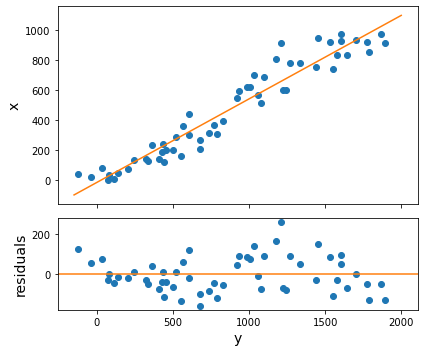

In [7]:
p_yx = np.polyfit(y, x, 1)
p_yx_eval = np.poly1d(p_yx)

fig = plt.figure(figsize=(6,5))
ax = plt.subplot2grid((3,1), (0, 0), rowspan=2)
ax_res = plt.subplot2grid((3,1), (2, 0), sharex=ax)

ax.plot(y, x, 'o')
ax.plot([-150,2000], p_yx_eval([-150,2000]))
ax.set_ylabel('x', fontsize=14)

ax_res.plot(y, x - p_yx_eval(y), 'o')
ax_res.axhline(color='C1')
ax_res.set_ylabel('residuals', fontsize=14)
ax_res.set_xlabel('y', fontsize=14)
plt.setp(ax.get_xticklabels(), visible=False)

fig.tight_layout()

print("For y vs. x, we find y = {:.4f}x + {:.4f}".format(p[0], p[1]))
print("\t for x=50 we would forecast y={:.2f}".format(p_eval(50)))
print("For x vs. y, we find x = {:.4f}y + {:.4f}".format(p_yx[0], p_yx[1]))
print("\t for x=50 we would forecast y={:.2f}".format((50 - p_yx[1])/p_yx[0]))

We have now uncovered lie #1! The relationship between $x$ and $y$ is *not* the same as the relationship between $y$ and $x$ (as far as least-squares fitting is concerned). 

Wait?! This is sorta like saying $F = ma$, but $a \neq F/m$. 

How can this be?

There are a couple essential assumptions that go into standard least-squares fitting:

1. There is one dimension along which the data have negligible uncertainties
2. Along the other dimension **all** of the uncertainties can be described via Gaussians of known variance

These two conditions are *rarely* met for astronomical data. While condition 1 can be satisfied (e.g., time series data where there is essentially no uncertainty on the time of the observations), I contend that condition 2 is rarely, if ever, satisfied.

## Problem 3) Lies, Damned Lies, and Statistics

While I may have stretched the definition of lie above, there are several misconceptions associated with model fitting (some of which are a direct consequence of using least-squares) that we should address.

**Lie #2**

For a 2-dimensional data set with one dependent variable (i.e. $y$ depends on $x$) and $n$ observations, a polynomial of the $n^\mathrm{th}$ degree can "perfectly" fit the data?

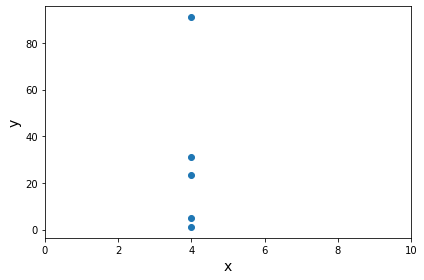

In [8]:
n_obs_n_poly()

This "lie" can only be true if the data are singularly valued at every value of the dependent variable. Polynomials of the form $y = \sum_n a_n x^n$ cannot take on multiple values of $y$ at a single value for $x$.

**Lie #3**

The model that minimizes the $\chi^2$ is best.

(or a slightly more nuanced version of this statement – the model with $\chi^2$ per degree of freedom is closest to 1 is best)

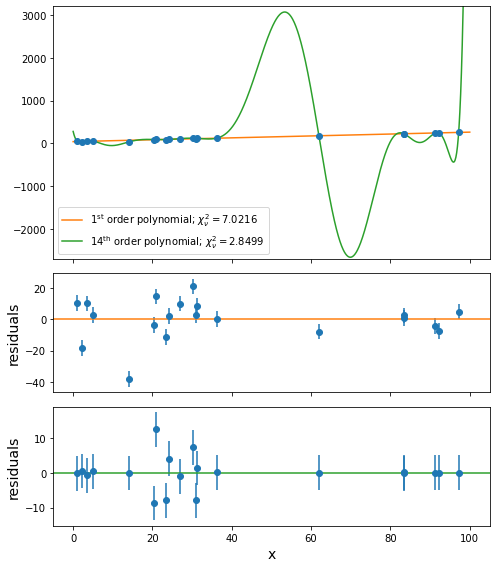

In [9]:
chi2_example()

In this case we see that increasing the order of the polynomial fit to the data lowers the "reduced" $\chi^2$, getting a value that is much much closer to 1. 

However, a "chi-by-eye" examination of the two models presented here suggests that there is absolutely no way that the $14^\mathrm{th}$-order polynomial provides a better explanation of the relationship between $y$ and $x$. Certainly, none of us would use this model for forecasting.

This should make you very weary of any $\chi^2$-minimization techniques as a method to identify the "best-fit" model.

(You will nevertheless find this in all sorts of papers throughout the literature.)

(Full disclosure - I have been guilty of this in the past)

This raises an important and critical question: how does one decide which model is "best"?

(This is well beyond the scope of this lecture, but we will talk about this on Thursday and Friday)

**Lie #3**

You cannot fit a model with more free parameters than there are data points.

Suppose you have the following data:

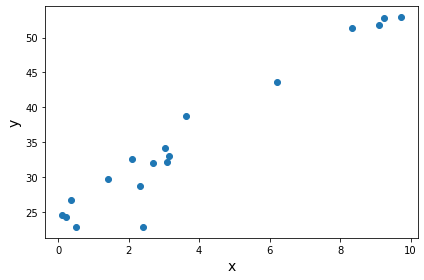

In [10]:
noisy_plot()

If you also suppose that $y$ varies linearly with $x$ (perhaps you have some theory that guides you towards this intuition), but that these data are produced via some noisy process, then you could write down the probability for any individual observation $y_i$ as:

$$P(y_i) = \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp{-\frac{(y_i - m x_i - b)^2}{2\sigma_i^2}}$$

where $m$ is the slope of the line, $b$ is the intercept, and $\sigma_i$ is the *unknown* uncertainty on the $i^\mathrm{th}$ observation.

(note - I am being a little sloppy in my notation)

The probability of all of the observations is then the product of the probability for each observation:

$$P = \prod_i P(y_i)$$

and the model for the data now has 20 parameters ($m$, $b$, and 1 $\sigma_i$ for each of the 18 observations) and only 18 observations.

Surely this is hopeless; we cannot possibly constrain $m$ and $b$, right? ...

**right?**

In [ ]:
nuissance_model()

Fitting a 20 parameter model with 18 data points...


This is somewhat amazing.

We have some data, we have no idea what the uncertainties are on the individual observations, and yet(!), we are able to recover the correct slope and intercept of the line.

(Note - we will discuss the particulars of the above model in greater detail later this week. I would rarely recommend the adopted model in practice!)

I hope at this stage I've convinced you that some common tropes regarding least-squares fitting do not always apply. 

I also hope that I've raised some concerns on your end about the best methods for determining the slope and intercept of linearly related data.

Now on to another major problem for least-squares fitting...

## Problem 4) Outliers

Suppose you have the following data set (*and* that you have reason to believe that the data are drawn from a linear relationship):

In [ ]:
plot_mix_model()

**Problem 4a**

These data "seem like" they have been drawn from a linear relationship, and you may want to know the slope and intercept of that line, but there are some outliers. 

What do you do?

*Take a minute to discuss with your partner*

Previously, we used least-squares fitting to determine the model parameters. Let's try that again, with one minor modification, we are going to assign a weight to each observation equal to the inverse of the variance for that observation.

(Note - [`np.polyfit()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) wants $1/\sigma_i$ as the weight, not $1/\sigma_i^2$)

In [ ]:
weighted_least_squares()

We can immediately see that weighted least-squares fitting does not work well in this case. 

We need to try another approach.

Can we just throw away the outliers? 

The challenge then is definitively identifying what is and what is not an outlier. In this case it seems like there are 4 outliers, but what about the point below the line at $x \sim{23}$?

One can use an iterative procedure, often referred to as $k\sigma$ clipping to remove outliers. The psuedo code is:

 - select some $k$ for clipping
 - fit model to data
 - identify all observations that are $> k\sigma$ away from the best-fit model
 - remove the outliers
 - repeat the fit and remove process until no outliers remain

There are still two major problems: how to choose $k$? 

(Is an observation that is $5.00001 \sigma$ off really all that worse than an observation that is $4.99999 \sigma$ off?)

The "outliers" are present in the initial fit, and as a result, they bias the model towards their location (for least-squares) and reduce the probability that they will be rejected as outliers.

Ultimately, the challenge with a least-squares approach and outliers is the use of a distance-squared "loss function." Skipping the derivation for now, the "best" model from least-squares comes from "minimizing the $\chi^2$" or "maximizing the likelihood" (these are the same thing):

$$\mathrm{best} = \min{\sum_i \frac{1}{2\sigma_i^2}(y - \mathrm{model})^2}$$

The term being minimized in this case is the "loss," and with a squared loss (as above) outliers play a far more significant role than observations that are close to the underlying relationship. 

In practice, any loss function can be adopted. An alternative approach to "rejecting" outliers is to instead, demphasize them, which removes the decision about what to throw away and what to keep. 

The [Huber loss](https://en.wikipedia.org/wiki/Huber_loss) function is  a good way to accomplish this goal. Briefly, the Huber loss is quadratic, but it transitions to linear at some (typically large) critical value  $c$.

In [ ]:
huber_plot()

If we apply the Huber loss to this data set, we find a fit that looks much better:

In [ ]:
minimize_huber()

However, there should still be something that is nagging at you a little bit – how do you choose the value for $c$? 

The truth is, there is no specific optimal choice of $c$, and thus, using the Huber loss function also requires an arbitrary decision. 

There has to be a better way!

(Indeed, there is, as we will see throughout the week...)

## Problem 5) Probability Theory

Suppose you have some event, which we will call $A$. We define the probability of event $A$ occurring as:

$$P(A).$$

Now suppose we want to know the probability that both event $A$ and event $B$ occur: $P(A \cap B)$. At first glance, it seems like this ought to be the product of the probability of $A$ and the probability of $B$:

$$P(A \cap B) = P(A)\,P(B).$$

However, this can only be true if $A$ and $B$ are *independent*.

To see why this is true, imagine a single coin. If event $A$ is a flip landing in heads, and event $B$ is a flip landing in tails, then $P(A)\,P(B) = 1/4$. However, the chances that a single coin flip results in both heads *and* tails is clearly 0. 

The probability of $A$ *and* $B$ therefore requires a statement about conditional probability:

$$P(A \cap B) = P(A\mid{B})\,P(B),$$

which should be read as "the probability of $A$ and $B$ is equal to the probability of $A$ given $B$ multiplied by the probability of $B$."

The probability of $A$ and $B$ must be equal to the probability of $B$ and $A$, which leads to:

$$P(A\mid{B})\,P(B) = P(B\mid{A})\,P(A),$$

which we can rearrange as:

$$P(A\mid{B}) = \frac{P(B\mid{A})\,P(A)}{P(B)}.$$


This is Bayes' Law. It is 100% percent true.

At times you may encounter arguments or opinions that are "anti-Bayes." I want to emphasize that these sentiments have to do with the interpretation of Bayes' Law, and not Bayes' Law itself.

We will cover the interpretation of Bayes' Law in  much greater detail this afternoon...

## Problem 6) Forecasting

In [ ]:
x, y, y_unc = gen_mix_data()

**Problem 6a**

Using the data from problem **4**, create a forecast for the value of $y$ at $x=50$. Generate as many forecasts as you can - using different methods (i.e. a least-squares fit to 1st, 2nd, 3rd, 4th, etc order polynomials is the same method). These methods do not all need to pass the "referee test."

*Note* – it is required that you talk with and work with your partner on this exercise. This is neither a contest or a race. If you want to try something that your partner is not familiar with you must first fully explain the method prior to implementation.

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=y_unc, marker="o", linewidth=0, elinewidth=1)
ax.plot(50, y.mean(), "o")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()